# SVM for Iris Dataset
~ Samreen Reyaz

In [220]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

%matplotlib inline

In [221]:
# import iris data
cols = ["sepal_length","sepal_width","petal_length","petal_width","iris_class"]
iris = pd.read_csv("iris.data",names=cols,header=None)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


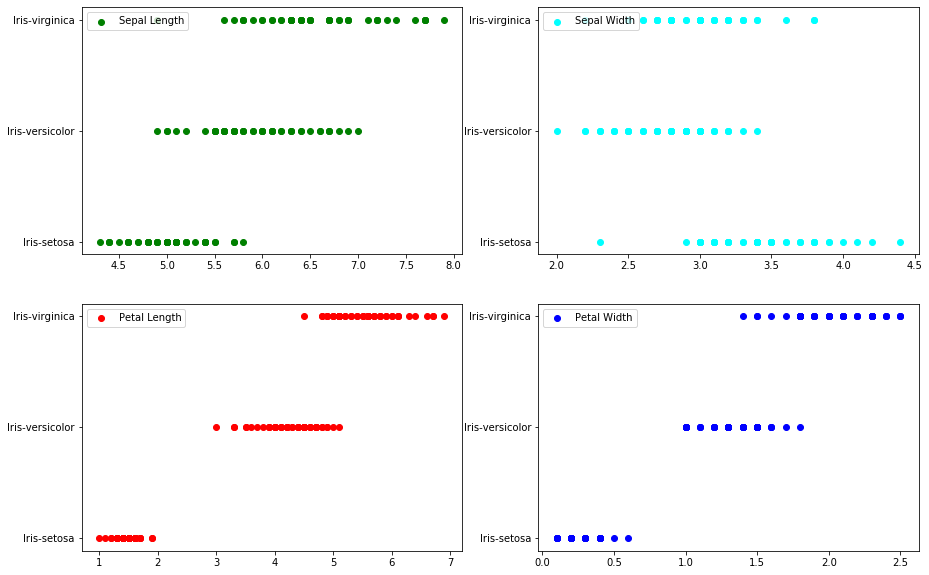

In [222]:
# plotting each predictor against the response
fig = plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.scatter(iris.sepal_length, iris.iris_class, label="Sepal Length", color="green")
plt.legend(loc ="upper left")

plt.subplot(2, 2, 2)
plt.scatter(iris.sepal_width, iris.iris_class, label="Sepal Width", color="cyan")
plt.legend(loc ="upper left")

plt.subplot(2, 2, 3)
plt.scatter(iris.petal_length, iris.iris_class, label="Petal Length", color="red")
plt.legend(loc ="upper left")

plt.subplot(2, 2, 4)
plt.scatter(iris.petal_width, iris.iris_class, label="Petal Width", color="blue")
plt.legend(loc ="upper left")

plt.show()

In [223]:
# split dataset
y = iris.iris_class
x = iris.drop('iris_class',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [224]:
# training the models with kernels linear, polynomial and rad
svc_linear = SVC(kernel='linear') # using the Linear kernel
svc_poly = SVC(kernel='poly', gamma='auto') # using the Polynomial kernel
svc_rbf = SVC(gamma='auto') # using the Radial Basis Function kernel
svc_linear.fit(x_train, y_train)
svc_poly.fit(x_train, y_train)
svc_rbf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [225]:
# testing the models
y_pred_linear = svc_linear.predict(x_test)
y_pred_poly = svc_poly.predict(x_test)
y_pred_rbf = svc_rbf.predict(x_test)

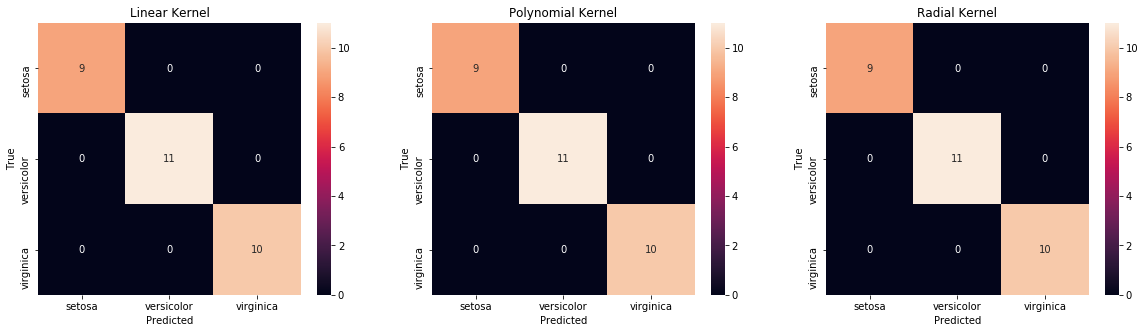

In [226]:
# using confusion matrix to evaluate models
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

f, axes = plt.subplots(1,3,figsize=(20,5))
# fig = plt.subplot(3,1,1)
cm_linear = confusion_matrix(y_test, y_pred_linear, labels)
cm_poly = confusion_matrix(y_test, y_pred_poly, labels)
cm_rbf = confusion_matrix(y_test, y_pred_rbf, labels)
sns.heatmap(cm_linear, annot=True, ax = axes[0])
sns.heatmap(cm_poly, annot=True, ax = axes[1])
sns.heatmap(cm_rbf, annot=True, ax = axes[2])

axes[0].set_title("Linear Kernel")
axes[1].set_title("Polynomial Kernel")
axes[2].set_title("Radial Kernel")

for i in range(len(axes)):
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
    axes[i].xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
    axes[i].yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])